## ANÁLISIS EXPLORATORIO DE DATOS

Este notebook contiene el reporte preliminar de datos que serán utilizados durante el proyecto. 



In [107]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

## Carga de datos

In [108]:
df = pd.read_excel('data/catalogo_streaming.xlsx')
df.head()

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,142,"Drama, Crimen",Frank Darabont,1900_2002,https://play.max.com/movie/9b4dacba-2f80-4272-...
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,"Misterio & Suspense, Drama, Acción & Aventura,...",Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...
2,Origen,Max,MOVIE,2570263.0,8.8,139.644,8.369,148,"Ciencia ficción, Acción & Aventura, Misterio &...",Christopher Nolan,2003_2010,https://play.max.com/movie/14552c93-d318-4563-...
3,El club de la lucha,Disney Plus,MOVIE,2345071.0,8.8,108.297,8.400,139,Drama,David Fincher,1998_2004,https://disneyplus.bn5x.net/c/1206980/705874/9...
4,El club de la lucha,Netflix,MOVIE,2345071.0,8.8,108.297,8.400,139,Drama,David Fincher,1995_2005,http://www.netflix.com/title/26004747


In [109]:
print('Cantidad de registros :', df.__len__())

Cantidad de registros : 19817


## Funciones utiles

In [110]:
def get_value_counts(dataframe: pd.DataFrame, column_name: str) -> pd.Series:
    """
    :param dataframe: The pandas DataFrame containing the data.
    :param column_name: The name of the column for which to get the value counts.
    :return: A pandas Series object containing the counts of each unique value in the specified column.
    """
    return dataframe[column_name].value_counts()


def count_values_in_column(dataframe: pd.DataFrame, column_name: str) -> pd.Series:
    """
    :param dataframe: A pandas DataFrame containing the data.
    :param column_name: The name of the column for which the values need to be counted.
    :return: A pandas Series object containing the count of each unique value in the specified column.
    """
    return get_value_counts(dataframe, column_name)


def filter_values_equal_than_k(dataframe : pd.DataFrame, column_name: str, k=1) -> pd.DataFrame:
    """
    Filters the values in the specified column of the given dataframe,
    keeping only the ones that occur equal than k value.

    :param dataframe: The dataframe containing the data.
    :type dataframe: pandas.DataFrame
    :param column_name: The name of the column to filter.
    :type column_name: str
    :k variable: The number of values to filter.
    :type k: int
    :return: A new dataframe with the filtered values.
    :rtype: pandas.DataFrame
    """
    value_counts = get_value_counts(dataframe, column_name)
    return value_counts[value_counts == k]


def filter_values_greater_than_k(dataframe : pd.DataFrame, column_name: str, k=1) -> pd.DataFrame:
    """
    Filters the values in the specified column of the given dataframe,
    keeping only the ones that occur more than k value.

    :param dataframe: The dataframe containing the data.
    :type dataframe: pandas.DataFrame
    :param column_name: The name of the column to filter.
    :type column_name: str
    :k variable: The number of values to filter.
    :type k: int
    :return: A new dataframe with the filtered values.
    :rtype: pandas.DataFrame
    """
    value_counts = get_value_counts(dataframe, column_name)
    return value_counts[value_counts > k]

def filter_values_lower_than_k(dataframe : pd.DataFrame, column_name: str, k=1) -> pd.DataFrame:
    """
    Filters the values in the specified column of the given dataframe,
    keeping only the ones that occur less than k value.

    :param dataframe: The dataframe containing the data.
    :type dataframe: pandas.DataFrame
    :param column_name: The name of the column to filter.
    :type column_name: str
    :k variable: The number of values to filter.
    :type k: int
    :return: A new dataframe with the filtered values.
    :rtype: pandas.DataFrame
    """
    value_counts = get_value_counts(dataframe, column_name)
    return value_counts[value_counts <= k]

## Descripciones iniciales

In [111]:
# Descripción de los datos
df.describe(include=object).T

,count,unique,top,freq
title,19817,18008,La niñera,5
platform,19817,6,Netflix,7109
type,19817,2,MOVIE,14060
genres,19665,4189,Documental,1277
director,14626,8812,Steven Spielberg,27
year_range,19817,27,2022,1697
url,19817,19062,http://www.netflix.com/title/81662957,2


In [112]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
imdbVotes,17854.0,48388.577630,148847.265886,5.000,462.00000,2849.5000,21969.75000,2906253.000
imdbScore,17927.0,6.399520,1.200258,1.100,5.70000,6.5000,7.30000,9.700
tmdbPopularity,19538.0,41.195589,131.031366,0.001,5.43325,14.4285,33.31250,4173.518
tmdbScore,18954.0,6.461363,1.254487,0.500,5.88950,6.6000,7.27375,10.000
runtime,19817.0,80.542867,37.092943,0.000,48.00000,89.0000,105.00000,263.000


### Title

Vemos que la variable referente al título no es única para todos registros que existen.

In [113]:
# Títulos que aparecen más de una vez
filtered_value_counts = filter_values_greater_than_k(df, column_name='title')
filtered_value_counts

La niñera                         5
La momia                          5
Perdida                           5
La boda de mi mejor amigo         5
El Grinch                         5
                                 ..
Ruslan: Venganza de un asesino    2
Dexter                            2
El lobo de Wall Street            2
La tormenta perfecta              2
Locuras en la universidad         2
Name: title, Length: 1631, dtype: int64

<Axes: ylabel='Frequency'>

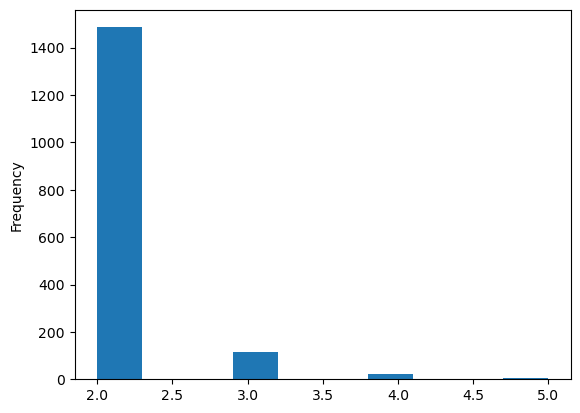

In [114]:
filtered_value_counts.plot(kind='hist')

In [115]:
# Mirando un registro en específico
df.loc[df['title'] == 'La momia']

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url
413,La momia,Disney Plus,MOVIE,464416.0,7.1,87.481,6.929,124,"Acción & Aventura, Fantasía",Stephen Sommers,1998_2004,https://disneyplus.bn5x.net/c/1206980/705874/9...
414,La momia,Amazon Prime Video,MOVIE,464416.0,7.1,87.481,6.929,124,"Acción & Aventura, Fantasía",Stephen Sommers,1998_2004,https://app.primevideo.com/detail?gti=amzn1.dv...
1162,La momia,Max,MOVIE,207602.0,5.4,123.168,5.510,110,"Misterio & Suspense, Acción & Aventura, Terror...",Alex Kurtzman,2016_2019,https://play.max.com/movie/c4fe03b2-1c83-4750-...
1163,La momia,Netflix,MOVIE,207602.0,5.4,123.168,5.510,110,"Misterio & Suspense, Acción & Aventura, Terror...",Alex Kurtzman,2013_2017,http://www.netflix.com/title/80161352
1164,La momia,Amazon Prime Video,MOVIE,207602.0,5.4,123.168,5.510,110,"Misterio & Suspense, Acción & Aventura, Terror...",Alex Kurtzman,2017_2018,https://app.primevideo.com/detail?gti=amzn1.dv...


Se puede observar que en este registro en particular, podemos ver 2 casos:

- Se repite el valor para cada plataforma 
- Se repiten títulos para diferentes películas y se diferencian por año de lanzamiento

En este notebook no se tiene como objetivo hacer una limpieza de datos por lo que este caso solo se reporta y no sé interviene. 

### Platform

Análisis de contenido en las plataformas

In [116]:
platform_counts = count_values_in_column(df, column_name='platform').to_frame(name='count') # se pasa a dataframe para manipularlo
platform_counts

,count
Netflix,7109
Amazon Prime Video,6436
Disney Plus,2980
Max,2585
Paramount Plus,475
Apple TV Plus,232


In [117]:
platform_counts['percentage'] = ( platform_counts['count'] / platform_counts['count'].sum() ) * 100 
platform_counts

,count,percentage
Netflix,7109,35.873240
Amazon Prime Video,6436,32.477166
Disney Plus,2980,15.037594
Max,2585,13.044356
Paramount Plus,475,2.396932
Apple TV Plus,232,1.170712


array([<Axes: title={'center': 'count'}>,
       <Axes: title={'center': 'percentage'}>], dtype=object)

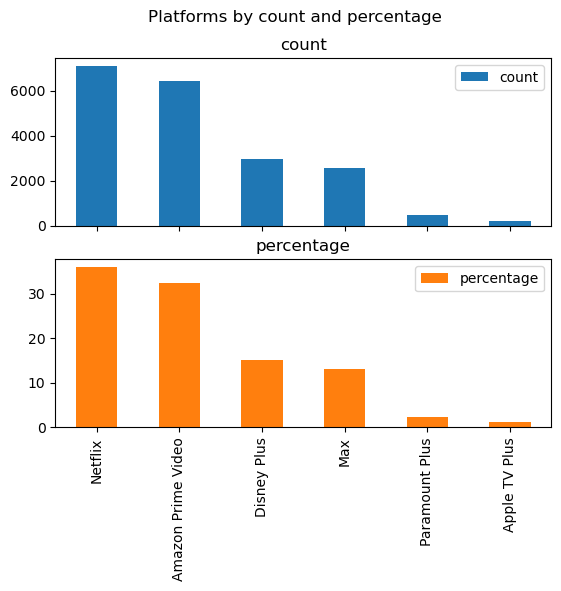

In [118]:
platform_counts.plot(kind='bar',subplots=True, title='Platforms by count and percentage')

Como podemos ver en general Netflix y Amazon representan más del 67% del contenido registrado. Esta variable puede a futuro ser analizada con la calidad de los contenidos que ambas plataformas contienen  

### Type

In [119]:
type_counts = count_values_in_column(df, column_name='type')
type_counts

MOVIE    14060
SHOW      5757
Name: type, dtype: int64

<Axes: title={'center': 'Distribution of types of content'}, ylabel='type'>

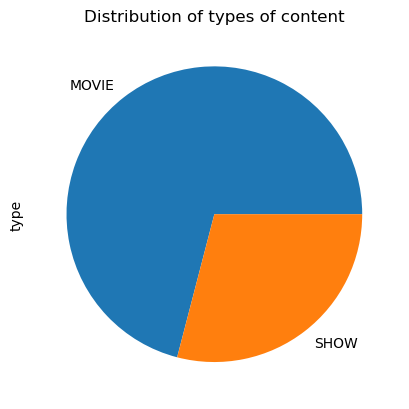

In [120]:
type_counts.plot(kind='pie', title='Distribution of types of content')

En el caso del tipo de contenido vemos que en su mayoría son películas. Esta variable a futuro se puede cruzar con otras para generar más valor

### Genres


In [121]:
# pasamos los generos de un string a un array 
df['genres'] = df['genres'].str.split(',', expand=False)
df['genres']

0                                         [Drama,  Crimen]
1        [Misterio & Suspense,  Drama,  Acción & Aventu...
2        [Ciencia ficción,  Acción & Aventura,  Misteri...
3                                                  [Drama]
4                                                  [Drama]
                               ...                        
19812                                    [Ciencia ficción]
19813                                            [Comedia]
19814                                                  NaN
19815                                                  NaN
19816                                           [Fantasía]
Name: genres, Length: 19817, dtype: object

In [122]:
# Copiamos los datos en un nuevo df para expandirlo 
df_genres = df.copy()
df_genres = df_genres.explode('genres') # Expandiendo los géneros 
df_genres['genres'] = [str(genre).strip() for genre in df_genres['genres']] #Limpieza de espacios
df_genres

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,142,Drama,Frank Darabont,1900_2002,https://play.max.com/movie/9b4dacba-2f80-4272-...
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,142,Crimen,Frank Darabont,1900_2002,https://play.max.com/movie/9b4dacba-2f80-4272-...
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,Misterio & Suspense,Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,Drama,Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,Acción & Aventura,Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...
...,...,...,...,...,...,...,...,...,...,...,...,...
19812,Три кота,Netflix,SHOW,NaN,NaN,13.684,5.400,5,Ciencia ficción,NaN,2013_2017,http://www.netflix.com/title/81208524
19813,أم الدراهم,Amazon Prime Video,SHOW,NaN,NaN,0.858,NaN,29,Comedia,NaN,2021,https://app.primevideo.com/detail?gti=amzn1.dv...
19814,ورق مسموم,Amazon Prime Video,SHOW,NaN,NaN,0.600,NaN,48,nan,NaN,2022,https://app.primevideo.com/detail?gti=amzn1.dv...
19815,ガクドリ,Amazon Prime Video,MOVIE,NaN,NaN,2.841,NaN,90,nan,Kei Era,2011_2013,https://app.primevideo.com/detail?gti=amzn1.dv...


In [123]:
genres_counts = count_values_in_column(df_genres, column_name='genres')
genres_counts

Drama                  9389
Comedia                7196
Acción & Aventura      4767
Misterio & Suspense    4674
Crimen                 3144
Romance                3139
Familia                3087
Documental             3031
Animación              2534
Fantasía               2434
Ciencia ficción        2291
Terror                 1601
Europeas               1505
Historia                957
Música                  838
Reality TV              771
Deporte                 654
Guerra                  485
Western                 231
nan                     152
Name: genres, dtype: int64

<Axes: title={'center': 'Distribution of genres'}>

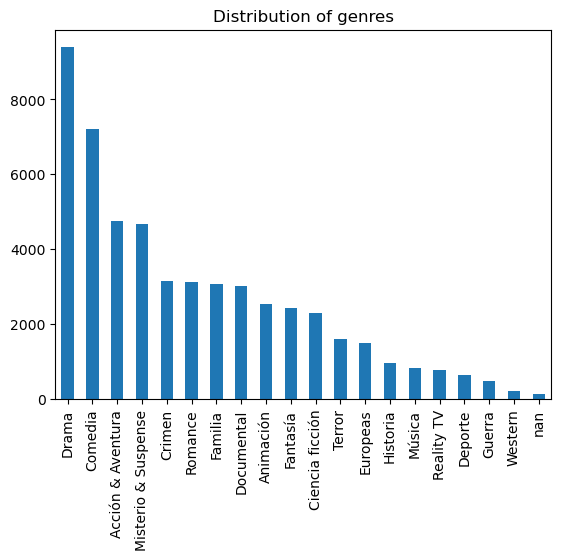

In [124]:
genres_counts.plot(kind='bar', title='Distribution of genres')

Podemos ver que varios géneros pueden pertenecer a un solo título, incluso, pueden existir títulos sin género reportado.

Este dato puede ser interesante comparándolo con el director

# Director

In [125]:
director_counts = count_values_in_column(df, column_name='director')
director_counts

Steven Spielberg                   27
Woody Allen                        24
Pedro Almodóvar                    21
Michael Bay                        21
Matías Gueilburt                   19
                                   ..
Kim Kwang-bin                       1
Stephen Sandoval, Tom Caulfield     1
Jessica Dimmock                     1
Jeannie Gaffigan                    1
Kikunojo Onoe                       1
Name: director, Length: 8812, dtype: int64

<Axes: title={'center': 'Distribution of directors'}>

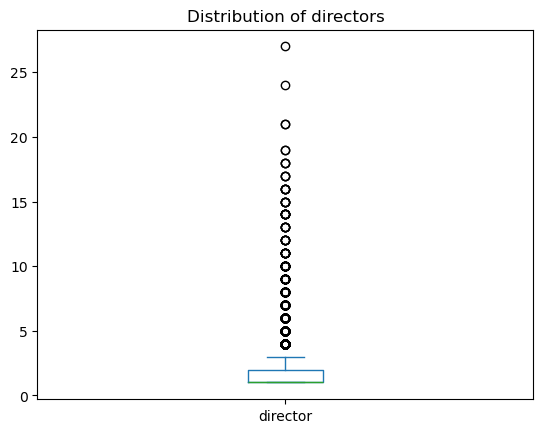

In [126]:
director_counts.plot(kind='box', title='Distribution of directors')

In [127]:
directors_one_title = filter_values_equal_than_k(df, column_name='director')
print('Cantidad de directores con un solo titulo: ', sum(directors_one_title))

Cantidad de directores con un solo titulo:  6179


Viendo el boxplot la mayoría de los directores tienen solo un título.  

Ahora veamos el plot solo con los directores que tienen más de un título.

In [128]:
directors_more_one_title = filter_values_greater_than_k(df, column_name='director')
print('Cantidad de directores con más de un solo titulo: ', sum(directors_more_one_title))

Cantidad de directores con más de un solo titulo:  8447


<Axes: title={'center': 'Distribution of directors'}>

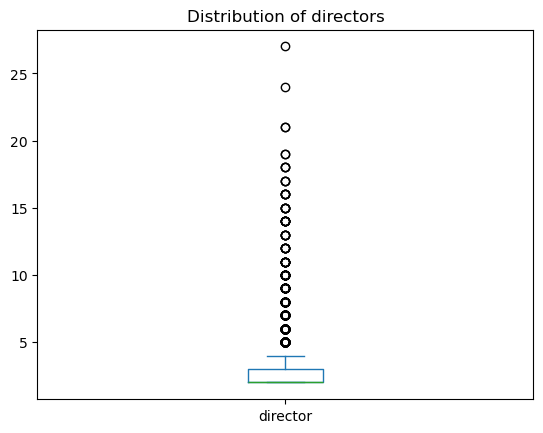

In [129]:
directors_more_one_title.plot(kind='box', title='Distribution of directors')

<Axes: title={'center': 'Distribution of directors'}, ylabel='Frequency'>

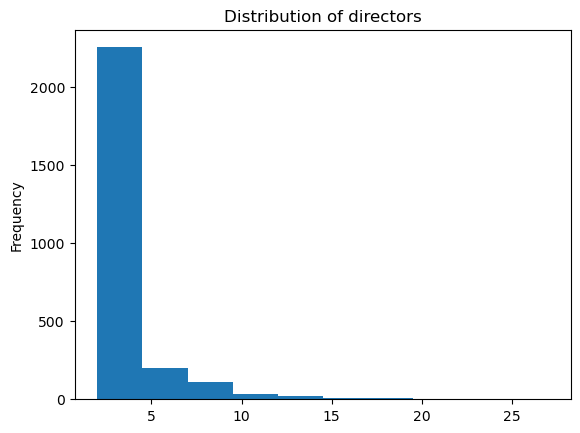

In [130]:
directors_more_one_title.plot(kind='hist', title='Distribution of directors')

Dada la distribución de directores, se buscará hacer una distinctión entre directores con más de 5 títulos y con menos de 5 títulos 

<Axes: title={'center': 'Distribution of directors, count-> 2340'}>

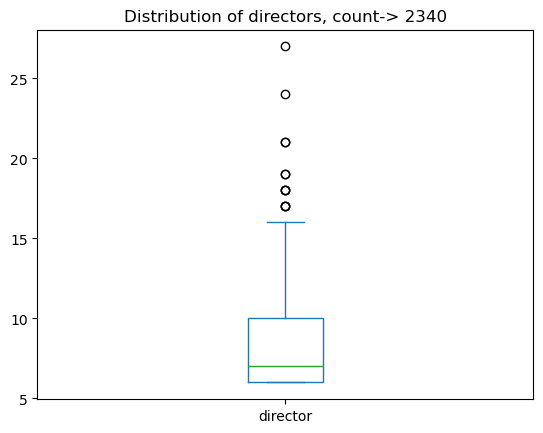

In [131]:
directors_more_five_titles = filter_values_greater_than_k(df, column_name='director', k=5)
directors_more_five_titles.plot(
    kind='box', 
    title=f'Distribution of directors, count-> {sum(directors_more_five_titles)}',
    xlabel = 'Directors with more than 5 titles'
)

<Axes: title={'center': 'Distribution of directors, count-> 12286'}>

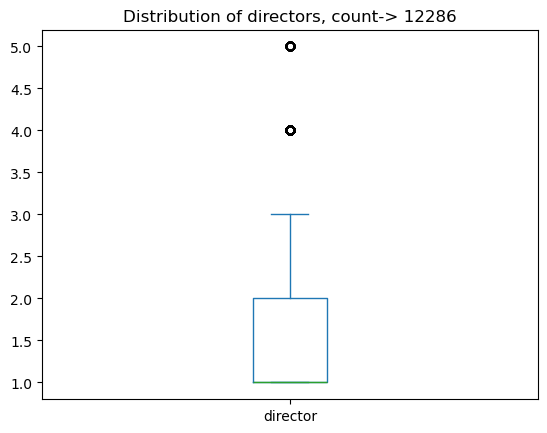

In [132]:
directors_less_five_titles = filter_values_lower_than_k(df, column_name='director', k=5)
directors_less_five_titles.plot(
    kind='box', 
    title=f'Distribution of directors, count-> {sum(directors_less_five_titles)}',
    xlabel = 'Directors with less than 5 titles'
)


Como podemos observar, separar en 2 grupos a los directores por su cantidad de títulos no cambia la distribución de datos particularmente, sin embargo, sirve para entender de forma más amena que existe un subgrupo de directores que tienden a tener más títulos que lo esperado por la distribución que sería un título, esto sin considerarse necesariamente como outliers. 

### Year_range

Rango de fechas en las que se lanza la película. 
Para este caso y por comodidad solo tomaremos la fecha minima como valor de estudio, ya que es el valor que usualmente se reporta como fecha de lanzamiento en el gremio de entretenimiento

In [133]:
# Suponiendo que ya tienes un DataFrame llamado df
df_years = df.copy()

# Asegurarse de que todos los valores sean cadenas
df_years['year_range'] = df_years['year_range'].astype(str)

# Verificar si el valor contiene '_'
df_years['min_year'] = df_years['year_range'].apply(lambda x: x.split('_')[0] if '_' in x else x)

# Convertir a entero, ignorando errores
df_years['min_year'] = df_years['min_year'].astype(int, errors='ignore')

# Mostrar el DataFrame resultante
df_years



,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,runtime,genres,director,year_range,url,min_year
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,142,"[Drama, Crimen]",Frank Darabont,1900_2002,https://play.max.com/movie/9b4dacba-2f80-4272-...,1900
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,152,"[Misterio & Suspense, Drama, Acción & Aventu...",Christopher Nolan,2003_2010,https://play.max.com/movie/52217243-a137-45d6-...,2003
2,Origen,Max,MOVIE,2570263.0,8.8,139.644,8.369,148,"[Ciencia ficción, Acción & Aventura, Misteri...",Christopher Nolan,2003_2010,https://play.max.com/movie/14552c93-d318-4563-...,2003
3,El club de la lucha,Disney Plus,MOVIE,2345071.0,8.8,108.297,8.400,139,[Drama],David Fincher,1998_2004,https://disneyplus.bn5x.net/c/1206980/705874/9...,1998
4,El club de la lucha,Netflix,MOVIE,2345071.0,8.8,108.297,8.400,139,[Drama],David Fincher,1995_2005,http://www.netflix.com/title/26004747,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19812,Три кота,Netflix,SHOW,NaN,NaN,13.684,5.400,5,[Ciencia ficción],NaN,2013_2017,http://www.netflix.com/title/81208524,2013
19813,أم الدراهم,Amazon Prime Video,SHOW,NaN,NaN,0.858,NaN,29,[Comedia],NaN,2021,https://app.primevideo.com/detail?gti=amzn1.dv...,2021
19814,ورق مسموم,Amazon Prime Video,SHOW,NaN,NaN,0.600,NaN,48,NaN,NaN,2022,https://app.primevideo.com/detail?gti=amzn1.dv...,2022
19815,ガクドリ,Amazon Prime Video,MOVIE,NaN,NaN,2.841,NaN,90,NaN,Kei Era,2011_2013,https://app.primevideo.com/detail?gti=amzn1.dv...,2011


In [134]:
df_years["min_year"].describe()

count    19817.000000
mean      2001.697532
std         38.930335
min       1900.000000
25%       2009.000000
50%       2017.000000
75%       2021.000000
max       2024.000000
Name: min_year, dtype: float64

<Axes: title={'center': 'Distribution of premiere years'}, xlabel='Years'>

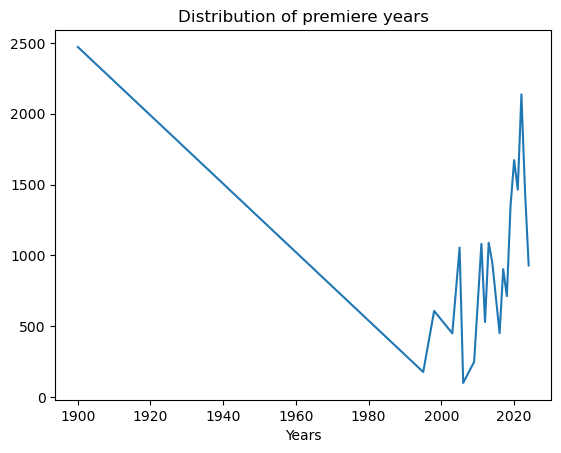

In [135]:
years_counts = count_values_in_column(df_years, column_name='min_year')
years_counts.index = years_counts.index.astype(int)  # Convierte los índices de year_counts a entero
years_counts = years_counts.sort_index()  # Ordena el DataFrame por índice, es decir, año
years_counts.plot(
    kind='line', 
    title='Distribution of premiere years', 
    xlabel='Years',

)

Lastimosamente, se evidencian errores de typo en las fechas y no concuerdan con el estreno de la pelicula, por lo cual obtaríamos por eliminar esta variable.

### URL

Esta columna es un valor unico por registro que lleva a su recurso en la web por lo que no sustancial para análisis.  

## Preprocesamiento de Datos

In [136]:
df_K_means = df_genres.copy()

df_K_means.dtypes

title              object
platform           object
type               object
imdbVotes         float64
imdbScore         float64
tmdbPopularity    float64
tmdbScore         float64
runtime             int64
genres             object
director           object
year_range         object
url                object
dtype: object

Eliminamos las variables que no vamos a realizar análisis.

In [137]:
# Eliminar las columnas "year_range" y "url"
df_K_means = df_K_means.drop(columns=['year_range', 'url', "runtime"])

# Mostrar el DataFrame resultante
df_K_means.head()


,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,genres,director
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,Drama,Frank Darabont
0,Cadena perpetua,Max,MOVIE,2906253.0,9.3,159.594,8.705,Crimen,Frank Darabont
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,Misterio & Suspense,Christopher Nolan
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,Drama,Christopher Nolan
1,El caballero oscuro,Max,MOVIE,2893241.0,9.0,111.674,8.516,Acción & Aventura,Christopher Nolan


### K-Means

Importamos los modulos y eliminamos los valores nulos.

In [138]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Eliminar filas con valores NaN
df_K_means = df_K_means.dropna()


Escalamos las variables numéricas imdbScore, tmdbScore, imdbVotes y tmdbPopularity. Escalar imdbVotes junto con otras variables numéricas asegura que todas estén en la misma escala, lo cual es crucial para algoritmos de clustering como K-means y DBSCAN, que son sensibles a las magnitudes. Sin escalar, las variables con mayores rangos pueden dominar la distancia euclidiana y afectar la formación de los clusters. La normalización permite que las diferencias entre variables sean comparables, asegurando que cada una contribuya equitativamente al análisis.

In [139]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Seleccionar las columnas a clusterizar
columns_to_cluster = ["imdbVotes", "imdbScore", "tmdbPopularity", "tmdbScore"]

# Escalar las columnas necesarias
scaler = StandardScaler()
df_K_means[columns_to_cluster] = scaler.fit_transform(df_K_means[columns_to_cluster])

df_K_means.head()


,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,genres,director
0,Cadena perpetua,Max,MOVIE,17.183580,2.675361,3.174437,2.167179,Drama,Frank Darabont
0,Cadena perpetua,Max,MOVIE,17.183580,2.675361,3.174437,2.167179,Crimen,Frank Darabont
1,El caballero oscuro,Max,MOVIE,17.104921,2.413968,2.022398,1.989411,Misterio & Suspense,Christopher Nolan
1,El caballero oscuro,Max,MOVIE,17.104921,2.413968,2.022398,1.989411,Drama,Christopher Nolan
1,El caballero oscuro,Max,MOVIE,17.104921,2.413968,2.022398,1.989411,Acción & Aventura,Christopher Nolan


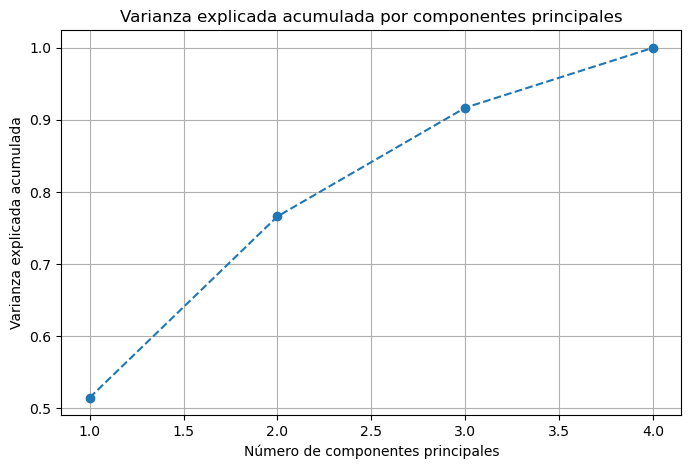

In [140]:
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA()
df_K_means_pca = pca.fit_transform(df_K_means[columns_to_cluster])

# Varianza explicada por cada componente
explained_variance = pca.explained_variance_ratio_

# Varianza explicada acumulada
cumulative_explained_variance = explained_variance.cumsum()

# Graficar la varianza explicada acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

Usamos n_components = 3 en PCA dado que explican más del 90% de la varianza. Clusterizamos con k-means las variables numéricas que nos interesan.

In [141]:
# Decidir el número de componentes a usar (por ejemplo, 2 componentes)
n_components = 3
pca = PCA(n_components=n_components)
df_K_means_pca = pca.fit_transform(df_K_means[columns_to_cluster])

# Realizar la clusterización con K-means
kmeans = KMeans(n_clusters=2, random_state=42)
df_K_means['cluster'] = kmeans.fit_predict(df_K_means_pca)

# Mostrar las primeras filas del dataframe para verificar los clusters
df_K_means.head()

c:\Users\joseh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,genres,director,cluster
0,Cadena perpetua,Max,MOVIE,17.183580,2.675361,3.174437,2.167179,Drama,Frank Darabont,0
0,Cadena perpetua,Max,MOVIE,17.183580,2.675361,3.174437,2.167179,Crimen,Frank Darabont,0
1,El caballero oscuro,Max,MOVIE,17.104921,2.413968,2.022398,1.989411,Misterio & Suspense,Christopher Nolan,0
1,El caballero oscuro,Max,MOVIE,17.104921,2.413968,2.022398,1.989411,Drama,Christopher Nolan,0
1,El caballero oscuro,Max,MOVIE,17.104921,2.413968,2.022398,1.989411,Acción & Aventura,Christopher Nolan,0


Graficamos los clusteres formados mirando las variables IMDB Score y TMBD Score.

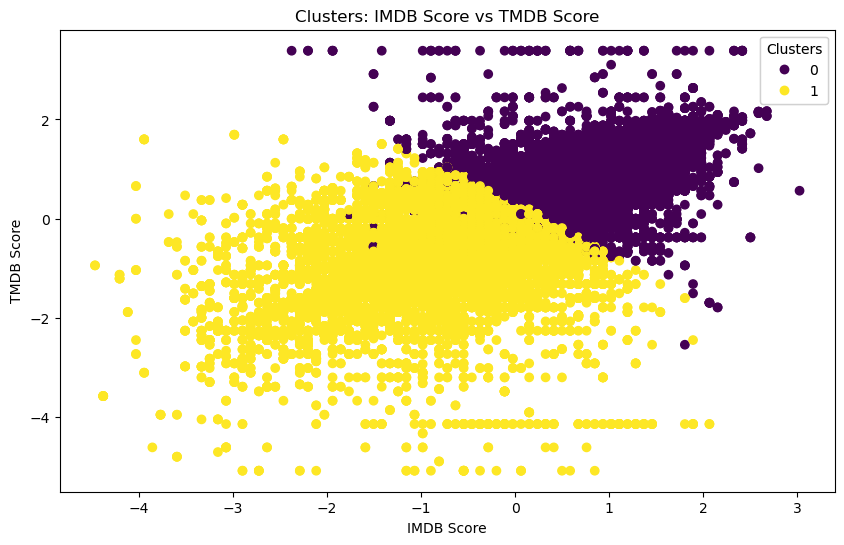

In [142]:
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_K_means['imdbScore'], df_K_means['tmdbScore'], c=df_K_means['cluster'], cmap='viridis')

# Añadir etiquetas y título
plt.xlabel('IMDB Score')
plt.ylabel('TMDB Score')
plt.title('Clusters: IMDB Score vs TMDB Score')

# Añadir leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Mostrar la gráfica
plt.show()


Graficamos los clusteres formados mirando las variables IMDB Score y TMBD Popularity.

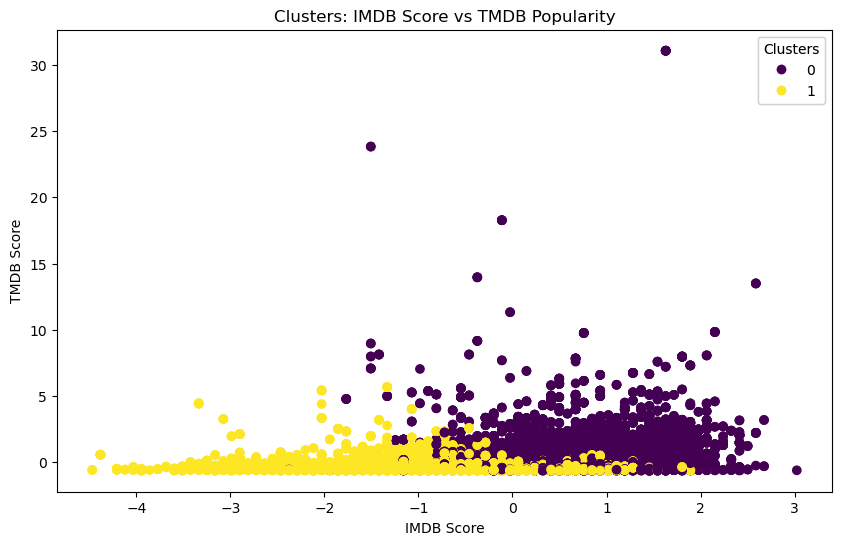

In [143]:
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_K_means['imdbScore'], df_K_means['tmdbPopularity'], c=df_K_means['cluster'], cmap='viridis')

# Añadir etiquetas y título
plt.xlabel('IMDB Score')
plt.ylabel('TMDB Score')
plt.title('Clusters: IMDB Score vs TMDB Popularity')

# Añadir leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Mostrar la gráfica
plt.show()

Graficamos los clusteres formados mirando las variables IMDB Score y TMBD Votes.

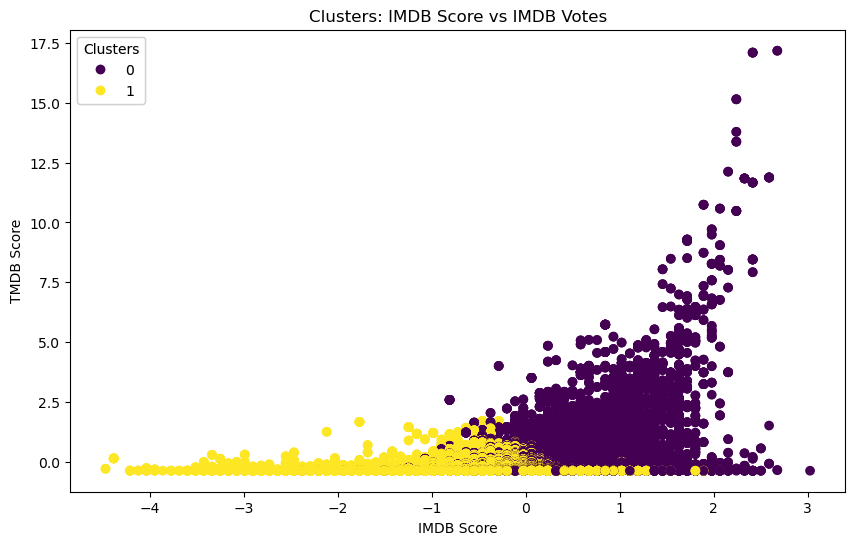

In [144]:
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_K_means['imdbScore'], df_K_means['imdbVotes'], c=df_K_means['cluster'], cmap='viridis')

# Añadir etiquetas y título
plt.xlabel('IMDB Score')
plt.ylabel('TMDB Score')
plt.title('Clusters: IMDB Score vs IMDB Votes')

# Añadir leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

# Mostrar la gráfica
plt.show()

Medimos la distancia euclideana al promedio del cluster que nos interesa para cada plataforma.

In [145]:
from sklearn.metrics import euclidean_distances

# Filtrar el dataframe para obtener solo las filas del cluster 2
cluster_obj = df_K_means[df_K_means['cluster'] == 0]

# Calcular el centroide del cluster 2
centroid_cluster_obj = cluster_obj[["imdbVotes", "imdbScore", "tmdbPopularity", "tmdbScore"]].mean().values.reshape(1, -1)

# Calcular la distancia euclidiana de cada fila al centroide del cluster 2
df_K_means['distance_to_cluster_obj'] = euclidean_distances(df_K_means[["imdbVotes", "imdbScore", "tmdbPopularity", "tmdbScore"]], centroid_cluster_obj).flatten()

# Calcular el acercamiento promedio al cluster 2 por cada valor en la columna "Platform"
platform_approach = df_K_means.groupby('platform')['distance_to_cluster_obj'].mean().reset_index()

# Ordenar de mayor a menor
platform_approach = platform_approach.sort_values(by='distance_to_cluster_obj', ascending=False)

# Mostrar el resultado
print(platform_approach)


             platform  distance_to_cluster_obj
0  Amazon Prime Video                 2.091047
5      Paramount Plus                 1.990138
3                 Max                 1.831370
2         Disney Plus                 1.766506
4             Netflix                 1.681479
1       Apple TV Plus                 1.239791


Analizamos las mejores plataformas por género y observamos la plataforma mejor rankeada de acuerdo a la distancia euclideana.

In [146]:
# Analizar, por cada valor en la variable "genres", el mejor platform de acuerdo a la distancia euclidiana calculada y añadir el puntaje de la distancia euclidiana
best_platform_per_genre = df_K_means.groupby('genres').apply(lambda x: x.loc[x['distance_to_cluster_obj'].idxmin()][['platform', 'distance_to_cluster_obj']]).reset_index()
best_platform_per_genre.columns = ['genres', 'best_platform', 'euclidean_distance_score']

# Mostrar el resultado
print(best_platform_per_genre)

                 genres       best_platform  euclidean_distance_score
0     Acción & Aventura         Disney Plus                  0.156397
1             Animación         Disney Plus                  0.190148
2       Ciencia ficción         Disney Plus                  0.156397
3               Comedia         Disney Plus                  0.156397
4                Crimen             Netflix                  0.256120
5               Deporte  Amazon Prime Video                  0.230451
6            Documental                 Max                  0.370940
7                 Drama  Amazon Prime Video                  0.160591
8              Europeas  Amazon Prime Video                  0.230451
9               Familia         Disney Plus                  0.190148
10             Fantasía         Disney Plus                  0.227956
11               Guerra  Amazon Prime Video                  0.350466
12             Historia  Amazon Prime Video                  0.268293
13  Misterio & Suspe

Analizamos el listado de cada género, por ejemplo Terror.

In [147]:
# Definir el género a analizar
genre_to_analyze = "Terror"

# Filtrar el dataframe para obtener solo las filas del género especificado
genre_df = df_K_means[df_K_means['genres'] == genre_to_analyze]

# Calcular el acercamiento promedio al cluster 0 por cada valor en la columna "Platform" para el género especificado
platform_approach_genre = genre_df.groupby('platform')['distance_to_cluster_obj'].mean().reset_index()

# Ordenar de mayor a menor
platform_approach_genre = platform_approach_genre.sort_values(by='distance_to_cluster_obj', ascending=False)

# Mostrar el resultado
print(platform_approach_genre)


             platform  distance_to_cluster_obj
0  Amazon Prime Video                 2.687383
4      Paramount Plus                 2.330395
3             Netflix                 2.133045
2                 Max                 1.891380
1         Disney Plus                 1.745788


Analizamos el listado de cada TIPO, por ejemplo de SHOWS.

In [148]:
# Definir el género a analizar
type_to_analyze = "SHOW"

# Filtrar el dataframe para obtener solo las filas del género especificado
genre_df = df_K_means[df_K_means['type'] == type_to_analyze]

# Calcular el acercamiento promedio al cluster 0 por cada valor en la columna "Platform" para el género especificado
platform_approach_genre = genre_df.groupby('platform')['distance_to_cluster_obj'].mean().reset_index()

# Ordenar de mayor a menor
platform_approach_genre = platform_approach_genre.sort_values(by='distance_to_cluster_obj', ascending=False)

# Mostrar el resultado
print(platform_approach_genre)

             platform  distance_to_cluster_obj
3                 Max                 2.352425
0  Amazon Prime Video                 2.071876
5      Paramount Plus                 2.058736
2         Disney Plus                 1.724847
4             Netflix                 1.573882
1       Apple TV Plus                 1.332167


### DBSCAN

In [151]:
from sklearn.cluster import DBSCAN

# Suponiendo que df_genres ya está definido y cargado con datos
df_DBSCAN = df_genres.copy()

# Eliminar las columnas "year_range", "url" y "runtime"
df_DBSCAN = df_DBSCAN.drop(columns=['year_range', 'url', 'runtime'])

# Eliminar filas con valores NaN
df_DBSCAN = df_DBSCAN.dropna()

# Seleccionar las columnas a clusterizar
columns_to_cluster = ["imdbVotes", "imdbScore", "tmdbPopularity", "tmdbScore"]

# Escalar las columnas necesarias
scaler = StandardScaler()
df_DBSCAN[columns_to_cluster] = scaler.fit_transform(df_DBSCAN[columns_to_cluster])

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=3)
df_DBSCAN_pca = pca.fit_transform(df_DBSCAN[columns_to_cluster])

df_DBSCAN.head()

,title,platform,type,imdbVotes,imdbScore,tmdbPopularity,tmdbScore,genres,director
0,Cadena perpetua,Max,MOVIE,17.183580,2.675361,3.174437,2.167179,Drama,Frank Darabont
0,Cadena perpetua,Max,MOVIE,17.183580,2.675361,3.174437,2.167179,Crimen,Frank Darabont
1,El caballero oscuro,Max,MOVIE,17.104921,2.413968,2.022398,1.989411,Misterio & Suspense,Christopher Nolan
1,El caballero oscuro,Max,MOVIE,17.104921,2.413968,2.022398,1.989411,Drama,Christopher Nolan
1,El caballero oscuro,Max,MOVIE,17.104921,2.413968,2.022398,1.989411,Acción & Aventura,Christopher Nolan


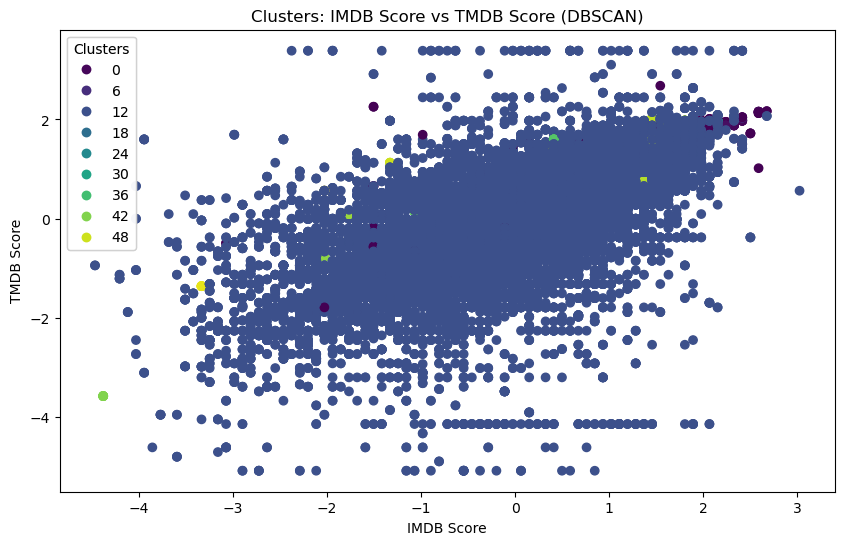

In [152]:
# Realizar la clusterización con DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_DBSCAN['cluster'] = dbscan.fit_predict(df_DBSCAN_pca)

# Crear la gráfica de dispersión para IMDB Score vs TMDB Score
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_DBSCAN['imdbScore'], df_DBSCAN['tmdbScore'], c=df_DBSCAN['cluster'], cmap='viridis')
plt.xlabel('IMDB Score')
plt.ylabel('TMDB Score')
plt.title('Clusters: IMDB Score vs TMDB Score (DBSCAN)')
legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)
plt.show()

Nuestro objetivo claro es identificar películas con puntajes altos, lo que hace que K-means sea una opción más adecuada para nuestro análisis. La simplicidad y la interpretabilidad de K-means nos permiten entender y explicar fácilmente los resultados, ya que el algoritmo produce clusters de tamaño similar y consistentes. Además, ajustamos el número de clusters para reflejar mejor la estructura de nuestros datos, asegurando que cada cluster represente de manera equilibrada las diferentes características de las películas, facilitando así la identificación de aquellas con los puntajes más altos.